<a href="https://colab.research.google.com/github/sgr1118/EX/blob/main/%5BExp_05%5D_Ai_Rock%2CScissor%2CPaper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 5-7. 미니 프로젝트 : 가위바위보 분류기를 만들자

In [ ]:
#  구글 드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 데이터 파일 알집 압축해제
%cd /content/drive/MyDrive/Aiffel/EX/image/
!unzip -qq "/content/drive/MyDrive/Aiffel/EX/image/data.zip"

/content/drive/MyDrive/Aiffel/EX/image


In [ ]:
# 모듈 불러오기
from PIL import Image
import matplotlib.pyplot as plt
import glob
import os
import tensorflow as tf
from tensorflow import keras

In [ ]:
# 1. 데이터 불러오기 + Resize
def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들이기
image_dir_path0 = "/content/drive/MyDrive/Aiffel/EX/image/scissor"
resize_images(image_dir_path0)
print("가위 이미지 resize 완료!")

image_dir_path1 = "/content/drive/MyDrive/Aiffel/EX/image/rock"
resize_images(image_dir_path1)
print("바위 이미지 resize 완료!")

image_dir_path2 = "/content/drive/MyDrive/Aiffel/EX/image/paper"
resize_images(image_dir_path2)
print("보 이미지 resize 완료!")

900  images to be resized.
900  images resized.
가위 이미지 resize 완료!
900  images to be resized.
900  images resized.
바위 이미지 resize 완료!
900  images to be resized.
900  images resized.
보 이미지 resize 완료!


In [ ]:
import numpy as np

def load_data(img_path, number_of_data=2700):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = '/content/drive/MyDrive/Aiffel/EX/image'

(x_train, y_train)=load_data(image_dir_path)

x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

# train 데이터 정규화 확인
print('최소값:',np.min(x_train), '최대값:',np.max(x_train))
print('최소값:',np.min(x_train_norm), '최대값:',np.max(x_train_norm))

학습데이터(x_train)의 이미지 개수는 2700 입니다.
x_train shape: (2700, 28, 28, 3)
y_train shape: (2700,)
최소값: 0 최대값: 255
최소값: 0.0 최대값: 1.0


라벨:  2


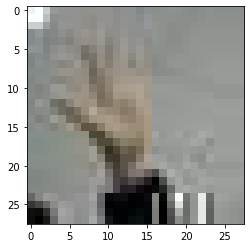

In [ ]:
# 임의로 이미지 출력
plt.imshow(x_train[2500])
print('라벨: ', y_train[2500])

In [ ]:
# 1. test 데이터 불러오기 + Resize
def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들이기
image_dir_path0_t = "/content/drive/MyDrive/Aiffel/EX/image/scissor_t"
resize_images(image_dir_path0_t)
print("가위 이미지 resize 완료!")

image_dir_path1_t = "/content/drive/MyDrive/Aiffel/EX/image/rock_t"
resize_images(image_dir_path1_t)
print("바위 이미지 resize 완료!")

image_dir_path2_t = "/content/drive/MyDrive/Aiffel/EX/image/paper_t"
resize_images(image_dir_path2_t)
print("보 이미지 resize 완료!")

200  images to be resized.
200  images resized.
가위 이미지 resize 완료!
200  images to be resized.
200  images resized.
바위 이미지 resize 완료!
200  images to be resized.
200  images resized.
보 이미지 resize 완료!


In [ ]:
# test 데이터셋 준비하기
import numpy as np

def load_data(img_path, number_of_data=600):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor_t/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock_t/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper_t/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("테스트데이터(x_test)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = '/content/drive/MyDrive/Aiffel/EX/image'

(x_test, y_test)=load_data(image_dir_path)

x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

# train 데이터 정규화 확인
print('최소값:',np.min(x_test), '최대값:',np.max(x_test))
print('최소값:',np.min(x_test_norm), '최대값:',np.max(x_test_norm))

테스트데이터(x_test)의 이미지 개수는 600 입니다.
x_test shape: (600, 28, 28, 3)
y_test shape: (600,)
최소값: 0 최대값: 255
최소값: 0.0 최대값: 1.0


In [ ]:
# 딥러닝 네트워크 설계
import tensorflow as tf
from tensorflow import keras
import numpy as np
from tensorflow.keras.layers import Dropout # Dropout 추가

n_channel_1=32
n_channel_2=64
n_dense=50
n_train_epoch=10

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', padding='same',input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

model.summary()

# x_train을 딥러닝 네트워크로 학습
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

cnn=model.fit(x_train_norm, y_train, epochs=n_train_epoch)

# test 데이터를 활용하여 시험
test_loss, test_accuracy = model.evaluate(x_test_norm, y_test, batch_size = 32, verbose = 0)
print("test_loss: {:.4f} ".format(test_loss))
print("test_accuracy: {:.4f}".format(test_accuracy))

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 32)        896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 2304)              0         
                                                                 
 dropout_2 (Dropout)         (None, 2304)             

# model.summary() 결과 해석

- 합성곱층(Cconv2D)의 출력 크기는 배치 차원을 제외하고 28*28*32이다. 합성곱 커널은 32개를 사용했으므로 마지막 차원이 32입니다. 모델 파라미터의 개수는 전체 가중치의 크기와 커널마다 하나씩 절편을 추가하면 3*3*3*32+32 = 896개이다

- 풀링층(MaxPooling2D)과 특성 맵을 완전 연결층에 펼쳐서 주입하기 위해 추가된 Flatten 층에는 가중치가 없습니다.

- 첫 번째 완전 연결층(Dense) 가중치 개수는 115250개에 비하여 합성곱층 가중치 개수가 적다. 그래서 합성곱층을 여러개 추가해도 학습할 파라미터의 개수가 크게 증가하지 않기 때문에 계산 효율성이 좋다.



In [ ]:
# train : 2100, test: 600 결과
test_loss: 3.4944941997528076 
test_accuracy: 0.5483333468437195

# train : 2400, test: 600 결과
test_loss: 1.300899624824524 
test_accuracy: 0.6800000071525574

# train : 2700, test : 600 결과
# Dropout 미적용
Epoch 10/10 loss: 0.0408 - accuracy: 0.9926
test_loss: 2.8948752880096436 
test_accuracy: 0.6483333110809326

#Dropout 적용
Epoch 10/10 loss: 0.1978 - accuracy: 0.9270
test_loss: 1.1447 
test_accuracy: 0.7133

# # train : 3000, test : 600 결과
test_loss: 1.4020864963531494 
test_accuracy: 0.6466666460037231

# train 데이터가 2700을 초과하면서부터 다시 test_accuracy가 감소하여 최종 결과는 train : 2700개, test : 600개로하였다.
# 데이터를 계속 추가하는 것도 방법으로 정확도를 더 올릴수있겠지만 CNN의 파라미터와 원리를 이해하는 것이 중요하다고 생각하였다.
# Dropout을 사용한 결과가 정확도가 더 높게 나온것으로보아 Dropout을 분석에 사용하는 것이 좋다고 생각합니다.

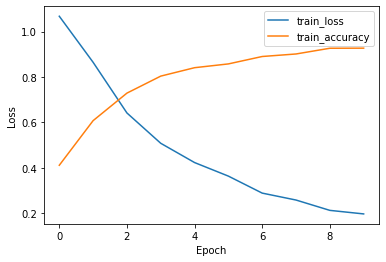

<Figure size 432x288 with 0 Axes>

In [ ]:
# 손실그래프와 정확도 출력
plt.plot(cnn.history['loss'])
plt.plot(cnn.history['accuracy'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train_loss', 'train_accuracy'])
plt.show()
plt.tight_layout()

In [ ]:
# 잘못 추출된 데이터 확인
predicted_result = model.predict(x_test_norm) # model이 추론한 확률값
predicted_labels = np.argmax(predicted_result, axis=1)

idx = 5 #6번째 x_test를 살펴보자.
print('model.predict() 결과 : ',predicted_result[idx])
print('model이 추론한 가장 가능성이 높은 결과 : ',predicted_labels[idx])
print('실제 데이터의 라벨 : ', y_test[idx])

model.predict() 결과 :  [4.4908598e-01 7.7368201e-09 5.5091399e-01]
model이 추론한 가장 가능성이 높은 결과 :  2
실제 데이터의 라벨 :  0


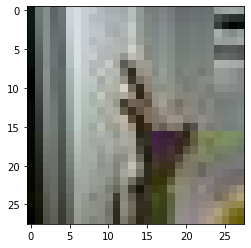

In [ ]:
plt.imshow(x_test[idx], cmap=plt.cm.binary)
plt.show()

예측확률분포: [6.6739845e-04 3.5164170e-11 9.9933261e-01]
라벨: 0, 예측결과: 2


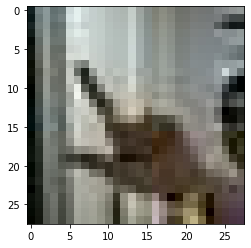

예측확률분포: [0.22893134 0.7373781  0.03369061]
라벨: 0, 예측결과: 1


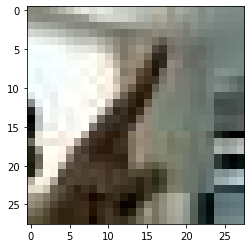

예측확률분포: [0.191428   0.05312352 0.7554484 ]
라벨: 0, 예측결과: 2


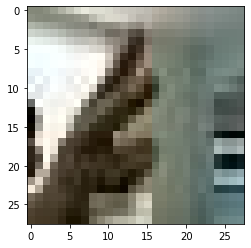

예측확률분포: [0.01820708 0.01924011 0.9625528 ]
라벨: 0, 예측결과: 2


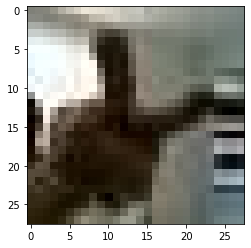

예측확률분포: [2.839390e-06 7.862426e-06 9.999893e-01]
라벨: 1, 예측결과: 2


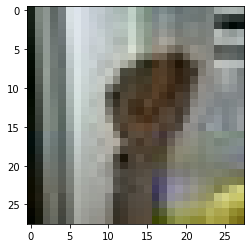

In [ ]:
import random
wrong_predict_list = []
for i, _ in enumerate(predicted_labels):
  # i번째 test_labels 와 y_test가 가른 경우만 모아보기
  if predicted_labels[i] != y_test[i]:
    wrong_predict_list.append(i)

# wrong_predict_list 에서 랜덤하게 5개만 뽑아봅시다.
samples = random.choices(population = wrong_predict_list, k = 5)

for n in samples:
  print('예측확률분포: ' + str(predicted_result[n]))
  print("라벨: " + str(y_test[n]) + ", 예측결과: " + str(predicted_labels[n]))
  plt.imshow(x_test[n], cmap=plt.cm.binary)
  plt.show()

# 회고

1. 이번 프로젝트에서 어려웠던 점
 
 (1) 합성곱신경망의 summary 결과를 해석할 때 각 층 파라미터 결과를 해석하기 힘들었습니다.

 (2) Conv2D의 각 출력층에 채널의 개수를 임의로 넣었습니다. 이 기준을 명확하게 알지못했습니다.
 

2. 프로젝트를 진행하면서 알게된 부분 또는 아직 이해하지 못한 부분

(1) [CNN 구조 구현](https://github.com/sgr1118/Do-it-Deep-Learning/blob/main/8ch_CNN.ipynb)

- CNN의 구조를 함수를 통하여 구현하여 작동원리를 학습했습니다.

(2) CNN에서 Dropout으로 test_accuracy가 높아진다는 것을 알 수 있었습니다.
- 드롭아웃을 사용하는 이유 

(2-1) 과적합 방지 (테스트 셋 오류 감소), 

(2-2) 컴퓨팅 자원 절약

(2-3) Dropout이란?
- 신경망에서 과대 적합을 줄이는 방법 중 한가지
- 무작위로 일부 뉴런을 비활성화시켜 특정 뉴런에 과도하게 의존하여 훈련하는 것을 막아줍니다.





참조

(1) [Dropout 참고](https://velog.io/@convin305/%EB%85%BC%EB%AC%B8%EB%A6%AC%EB%B7%B0-dropout%EC%9D%84-%ED%86%B5%ED%95%9C-CNN%EB%AA%A8%EB%8D%B8-%ED%96%A5%EC%83%81%EC%8B%9C%ED%82%A4%EA%B8%B0)

(2) [Do it! 딥러닝 입문](http://www.kyobobook.co.kr/product/detailViewKor.laf?ejkGb=KOR&mallGb=KOR&barcode=9791163031093&orderClick=LAG&Kc=) (저자 : 박해선 / 참고한 내용 :CNN-합성곱연산 이론 및 코드 / 참고한 페이지 : 234~278p)

(3) [batch_size 기준 참고](https://deep-learning-study.tistory.com/647)
